# Deep Learning - CNN

## BRZOZOWSKI MAREK

## The classic MNIST dataset will be used to explore:

## Hand-writtien Recognition using CNN a class of Deep Neural Networks 


Neural Networks are a series algorithms for building a computer program that learns from data. It loosely resembles the way our human brains operate. Neurons in the simplest form are links that activate on certain responses whether chemical signals or data inputs for computers. As the brain evolves to create new linking neurons so to does nequral networks as they adapt to changing inputs. 

Convolutional neural networks (CNN) are artifical neural networks that are popular in computing vision tasks. CNN are designed to automatically and adaptively learn spatial hierarchies of features through backpropagation by using multiple blocks such as convolutional layers, pooling layers and fully connected layers.

In [1]:
# Load Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import time
import random

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers.convolutional import Convolution2D, MaxPooling2D

%matplotlib inline 

Using TensorFlow backend.


In [2]:
# Load MNIST Dataset and determine the shape
mnist = keras.datasets.mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()
_, image_row , image_column = x_train.shape

print('Shape of x_train',x_train.shape)
print('Shape of x_test',x_test.shape)
print('Shape of y_train',y_train.shape)
print('Shape of y_test',y_test.shape)


Shape of x_train (60000, 28, 28)
Shape of x_test (10000, 28, 28)
Shape of y_train (60000,)
Shape of y_test (10000,)


In [3]:
# Features of mnist
print(dir(mnist))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'absolute_import', 'division', 'get_file', 'load_data', 'np', 'print_function']


In [4]:
# Image Dimensions
num_classes = len(np.unique(y_train))

print('Number of Training Photos', x_train.shape[0])
print('Number of Test Photos', x_test.shape[0])
print('Image Row Matrix', image_row)
print('Image Row Matrix', image_column)
print('Number of unique values in train/test label', num_classes)

Number of Training Photos 60000
Number of Test Photos 10000
Image Row Matrix 28
Image Row Matrix 28
Number of unique values in train/test label 10


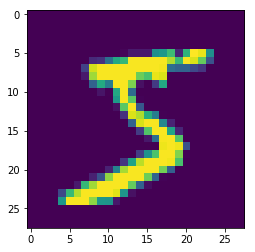

In [5]:
# Display a single image
plt.imshow(x_train[0])
plt.show()

In [6]:
# Reshape and Normalizing Colouring
x_train = x_train.reshape(x_train.shape[0], 1, image_row, image_row).astype('float32')
x_test = x_test.reshape(x_test.shape[0],1, image_row, image_column).astype('float32')

# Grey Scale 0 is Black, 255 is White
x_train /= 255
x_test /= 255

# Converts a class vector (integers) to binary class matrix. For use with categorical_crossentropy.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [7]:
# Check shape again
y_train.shape[0]

60000

In [8]:
# Function: Plot model accuracy and loss
def plot_model(model_history):
    fig, ax = plt.subplots(1,2,figsize=(18,6))
    
    # First subplot:
    # A historical plot for the accuracy of the model
    ax[0].plot(
        range(1,len(model_history.history['acc'])+1),
        model_history.history['acc']
    )


    ax[0].set_title('Model Accuracy')
    ax[0].set_ylabel('Accuracy')
    ax[0].set_xlabel('Epoch')

    ax[0].set_xticks(
        np.arange(1,len(model_history.history['acc'])+1),
        len(model_history.history['acc'])/10
    )

    
    # Second subplot:
    # A historical plot for the lost of the model
    ax[1].plot(
        range(1,len(model_history.history['loss'])+1),
        model_history.history['loss'])
    
    ax[1].set_title('Model Loss')
    ax[1].set_ylabel('Loss')
    ax[1].set_xlabel('Epoch')
    
    ax[1].set_xticks(
        np.arange(1,len(model_history.history['loss'])+1),
        len(model_history.history['loss'])/10
    )

    plt.show()

## Notes
Convolution is a mathematical operation to merge two sets of information.
Hyperparameter or size 3x3 matrix filter.
Pooling layer: Reduce the resolution of the feature to a 2x2
Dropout to reduce overfitting. Dropout can be used after convolutional layers (e.g. Conv2D) and after pooling layers (e.g. MaxPooling2D). Often, dropout is only used after the pooling  layers, but this is just a rough heuristic.
Last layer is set to the number of unique answers to provide an array or zeros and one True.

In [9]:
model = Sequential()

model.add(Convolution2D(32,(3,3), 
                        border_mode='same',
                        input_shape=(1,28,28),
                        data_format='channels_first')
         )
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,(3,3), border_mode='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Activation('relu'))

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()




C:\Users\Marek\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(1, 28, 28..., data_format="channels_first", padding="same")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 28, 28)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 28, 28)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 14, 28)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 14, 64)        16192     
_________________________________________________________________
activation_2 (Activation)    (None, 16, 14, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 7, 64)          0         
__________

C:\Users\Marek\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# Compiling model with the measurements metrics and optimizers.
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
    )


Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 79us/step - loss: 0.3347 - acc: 0.8995 - val_loss: 0.1267 - val_acc: 0.9623
Epoch 2/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.1181 - acc: 0.9633 - val_loss: 0.0837 - val_acc: 0.9743
Epoch 3/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.0830 - acc: 0.9743 - val_loss: 0.0661 - val_acc: 0.9809
Epoch 4/20
48000/48000 [==============================] - 3s 53us/step - loss: 0.0685 - acc: 0.9785 - val_loss: 0.0571 - val_acc: 0.9826
Epoch 5/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.0588 - acc: 0.9814 - val_loss: 0.0493 - val_acc: 0.9858
Epoch 6/20
48000/48000 [==============================] - 3s 52us/step - loss: 0.0483 - acc: 0.9847 - val_loss: 0.0445 - val_acc: 0.9863
Epoch 7/20
48000/48000 [==============================] - 2s 52us/step - loss: 0.0422 - acc: 0.9864 - val_loss: 0.0471 - val_acc

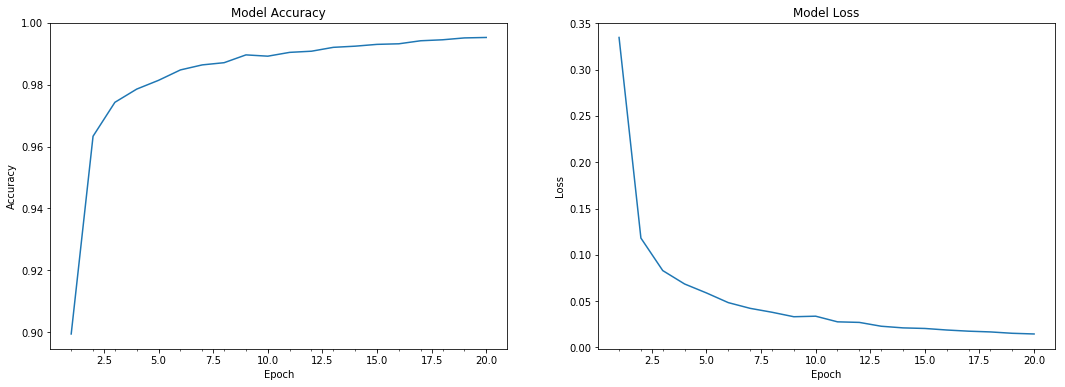

10000/10000 [==============================] - 0s 50us/step
0.03355695701813584 0.9904
Model run time in seconds:  51.7519006729126
Model accuracy is:  0.9904


In [11]:
start = time.time()

model_info = model.fit(
    x_train, y_train,
    epochs=20,
    batch_size= 150, 
    verbose= 1, 
    validation_split= 0.2
    )
    
end = time.time()

plot_model(model_info)

val_loss,val_acc=model.evaluate(x_test,y_test)
print(val_loss,val_acc)

print('Model run time in seconds: ', (end-start))
print('Model accuracy is: ', val_acc)

In [12]:
# Predict the test feature data set
predictions=model.predict([x_test])
np.shape(predictions)

(10000, 10)

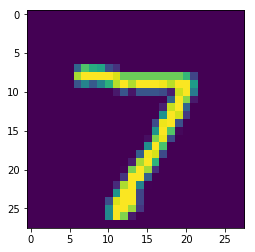

Model predicted:  7


In [13]:
# Visualize check
plt.imshow(x_test[0].reshape(28,28))
plt.show()

print('Model predicted: ', np.argmax(predictions[0]))

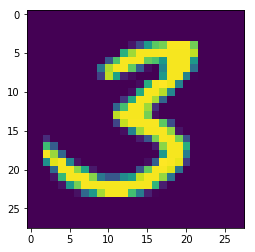

Model predicted:  3


In [14]:
# Random test sample checks
def random_pull():
    rand = random.randint(1,x_test.shape[0])
    plt.imshow(x_test[rand].reshape(28,28))
    plt.show()

    print('Model predicted: ', np.argmax(predictions[rand]))

random_pull()